Enter list of stock tickers separated by commas: BA
[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>


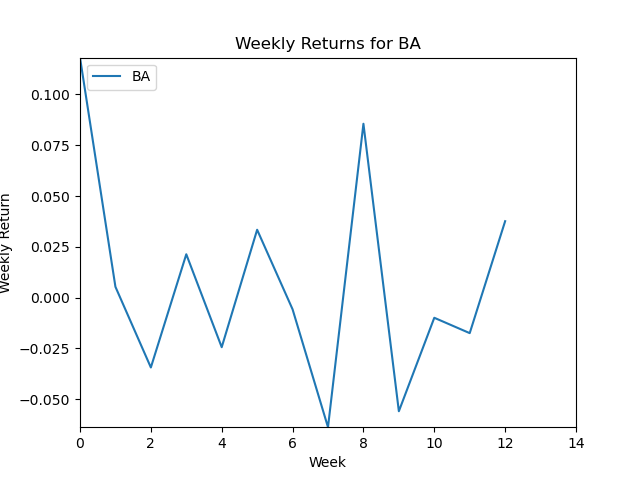

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib nbagg

# Get list of stock tickers from user
tickers = input("Enter list of stock tickers separated by commas: ").split(",")

# Fetch weekly closing prices for each ticker for the last 2 months
prices = {}
for ticker in tickers:
    data = yf.download(ticker, period="3mo", interval="1wk")
    prices[ticker] = data["Close"]

# Compute weekly returns for each ticker
returns = {}
for ticker, prices in prices.items():
    returns[ticker] = (prices / prices.shift(1) - 1).dropna()

# Create figure and axes for the plot
fig, ax = plt.subplots()
ax.set_xlim([0, len(returns[tickers[0]])])
ax.set_ylim([min([min(r) for r in returns.values()]), max([max(r) for r in returns.values()])])
ax.set_xlabel("Week")
ax.set_ylabel("Weekly Return")

# Initialize lines for each ticker
lines = []
for ticker in tickers:
    line, = ax.plot([], [], label=ticker)
    lines.append(line)
    
# Initialize legend and title
ax.legend(loc="upper left")
plt.title("Weekly Returns for {}".format(", ".join(tickers)))

# Define function to update the plot with each frame of the animation
def update(frame):
    for i, ticker in enumerate(tickers):
        lines[i].set_data(list(range(frame)), returns[ticker][:frame])
    return lines

# Create animation
ani = FuncAnimation(fig, update, frames=len(returns[tickers[0]]), blit=True, repeat=False)

# Option to save animation as MP4 video file
#save_as_video = input("Do you want to save the animation as an MP4 video file? (y/n): ")
if save_as_video.lower() == "y":
    file_name = input("Enter file name for the video file (without extension): ")
    writer = plt.animation.FFMpegWriter(fps=30)
    ani.save("{}.mp4".format(file_name), writer=writer)

# Show the plot
plt.show()


In [18]:
#space to test retrieving environment variables from .env file
from dotenv import load_dotenv
load_dotenv()
import os
myemail = os.environ.get("my_email")
print(myemail)

[redaccted]'


In [17]:
#space to test retrieving environment variavles from config file
from config import my_email

print(my_email)

[redacted]
